
# Assignment No 2b
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Gaussian **Naive** Bayes Classifier.


Naive Bayes Rule 
==============
*Sibt ul Hussain*

There are three different flavours of (Naive) Bayes Rule

- Binomial Naive Bayes (We saw last time, in case of spam classification)
- Multinomial Naive Bayes
- **Gaussian Naive Bayes**


### Instructions
- Do not modify the block with test cases.
- Do not tailor your solution to only pass the test cases. We will use different data for grading so keep your solution generic.
- Passing all the cases means you are in reight direction, but does not ensure 100% marks, there may be some other cases hidden, so carefully read the question statement and implement all the necessory functionality.
- <p style="color:#ff0000">Plagiarism of any kind, (including internet) will lead to zero marks.</p>

#### Libraries
Ther are two additional libraries used which are not included in Anaconda package, nose and seaborn. You can install them using the following commands :
```sh
conda install -c anaconda nose=1.3.7
conda install -c anaconda seaborn=0.7.1
```
Version of different libraries used are listed below:
- Matplotlib **1.5.1**
- Pandas **0.18.1**
- Numpy **1.11.1**
- Scipy **0.17.1**
- Seaborn **0.7.1**

Code for checking version info is present in cell below.

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.


**Note : ** Accuracies may slightly vary due to randomness in train-text split.

In [1]:
%pylab inline
import scipy.stats
import pandas as pd
from collections import defaultdict
import seaborn as sns
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
print "Matplotlib version : ", matplotlib.__version__
print "Pandas version : ", pd.__version__
print "Numpy version : ", np.__version__
print "Scipy version : ", scipy.__version__
print "Seaborn version : ", sns.__version__

Matplotlib version :  2.1.0
Pandas version :  0.20.3
Numpy version :  1.13.3
Scipy version :  0.19.1
Seaborn version :  0.8.0


In [3]:
help(scipy.stats.norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(self, x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [4]:
# YOUR CODE HERE

class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        pass
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x n] data matrix and Y labels matrix'''
        
        # YOUR CODE HERE
        #split the classes
        self.uniquelabels=np.unique(Y)
        #print self.uniquelabels
        self.nclasses=len(self.uniquelabels)
        classes=[X[(Y==x)] for x in self.uniquelabels]
        C1=np.array(classes[0],dtype=float)
        C2=np.array(classes[1],dtype=float)
        C3=np.array(classes[2],dtype=float)
        #mean of classes
        self.meanC1=np.mean(C1,axis=0)
        self.meanC2=np.mean(C2,axis=0)
        self.meanC3=np.mean(C3,axis=0)
        #print "Mean \n",self.meanC1," ",self.meanC2," ",self.meanC3
        #centered Data Matrix
        ZC1=C1-self.meanC1
        ZC2=C2-self.meanC2
        ZC3=C3-self.meanC3
        #print ZC1.shape
        y=np.arange(0,ZC1.shape[1],1)
        #self.varC1=[z/(len(C1)*1.0) for z in [np.dot(ZC1.T[x],ZC1.T[x].T) for x in y]]
        #self.varC2=[z/(len(C2)*1.0) for z in [np.dot(ZC2.T[x],ZC2.T[x].T) for x in y]]
        #self.varC3=[z/(len(C3)*1.0) for z in [np.dot(ZC3.T[x],ZC3.T[x].T) for x in y]]
        #self.covC2=np.empty()
        self.varC1=np.var(ZC1,axis=0)
        self.varC2=np.var(ZC2,axis=0)
        self.varC3=np.var(ZC3,axis=0)
        #print "variance \n",self.varC1," ",self.varC2," ",self.varC3
        self.total=len(Y)#total length of DataSet
        #prior probabilities
        #print len(C1)
        self.pC1=np.log(len(C1)/(self.total*1.0))
        self.pC2=np.log(len(C2)/(self.total*1.0))
        self.pC3=np.log(len(C3)/(self.total*1.0))
        #print self.meanC1,"\n",self.varC1**0.5
        #print C1[0]
        #print scipy.stats.norm.pdf(C1[0],self.meanC1,self.varC1**0.5)
        
    def test(self, X):
        
        ''' Run the trained classifiers on the given set of examples 
            For each example, you should return probability and its assigned class
            Input: X of m x d
            Output:
            pclasses: predicted class of each example
            probability: probability of each example falling in that predicted class...
        '''
        
        nexamples, nfeatures=X.shape
        res=np.zeros((nexamples,self.nclasses))
        pclasses=[""]*nexamples
        
        # YOUR CODE HERE
        i=0
        for ex in X:
            pdf=scipy.stats.norm.pdf(ex,self.meanC1,self.varC1**0.5)
            posteriorC1=np.sum(np.log(pdf))+self.pC1
            pdf=scipy.stats.norm.pdf(ex,self.meanC2,self.varC2**0.5)
            posteriorC2=np.sum(np.log(pdf))+self.pC2
            pdf=scipy.stats.norm.pdf(ex,self.meanC3,self.varC3**0.5)
            posteriorC3=np.sum(np.log(pdf))+self.pC3
            if(posteriorC1>posteriorC2 and posteriorC1>posteriorC3):
                pclasses[i]=(self.uniquelabels[0])
                #print(self.uniquelabels[0],posteriorC1)
            elif(posteriorC2>posteriorC1 and posteriorC2>posteriorC3):
                pclasses[i]=(self.uniquelabels[1])
                #print(self.uniquelabels[1],posteriorC2)
            elif(posteriorC3>posteriorC1 and posteriorC3>posteriorC2):
                pclasses[i]=(self.uniquelabels[2])
            res[i]=[posteriorC1,posteriorC2,posteriorC3]
            i+=1
        return np.array(pclasses), res
    
    def predict(self, X):
        return self.test(X)[0]    
        

In [5]:
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Get your data in matrix

In [6]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


#### Let's Plot the Data

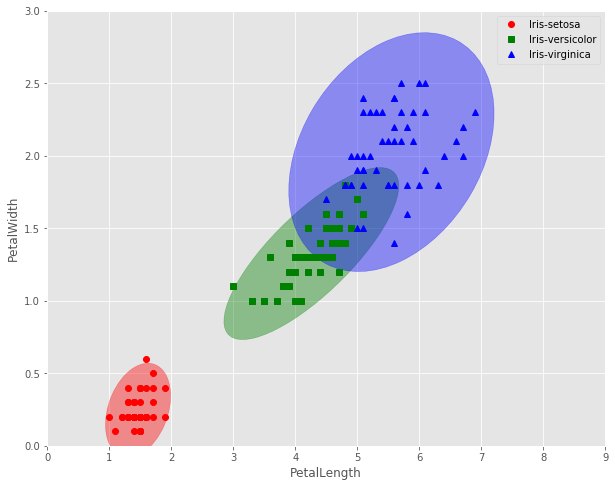

In [7]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [8]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


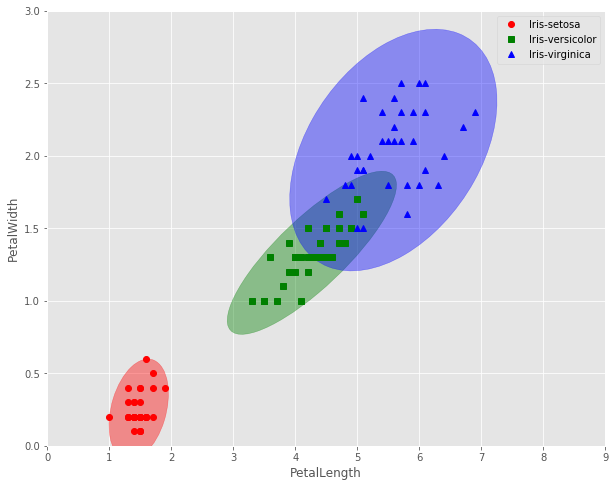

In [9]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

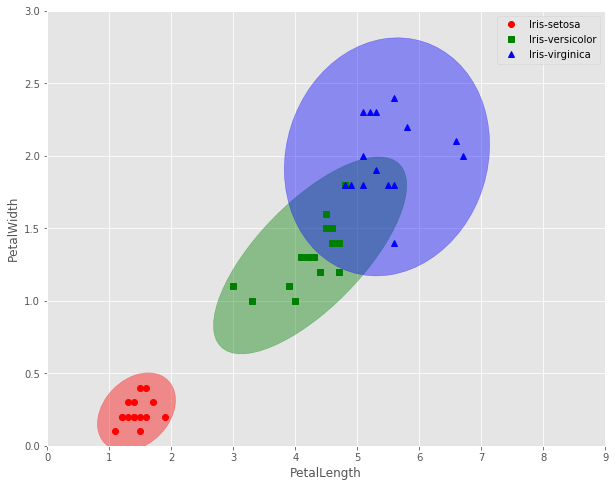

In [10]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [49]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

In [50]:
#Lets test it on the set of unseen examples...
pclasses,res=gb.test(Xtest[:,2:])

Lets see how good we are doing...
==================

In [51]:
#Lets see how good we are doing...
print pclasses==Ytest
print Ytest.shape[0]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45


In [52]:
# Using Just two attributes, accuracy is 
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])


45
Accuracy =  1.0


 Plotting the Decision Surface of Training Set... 


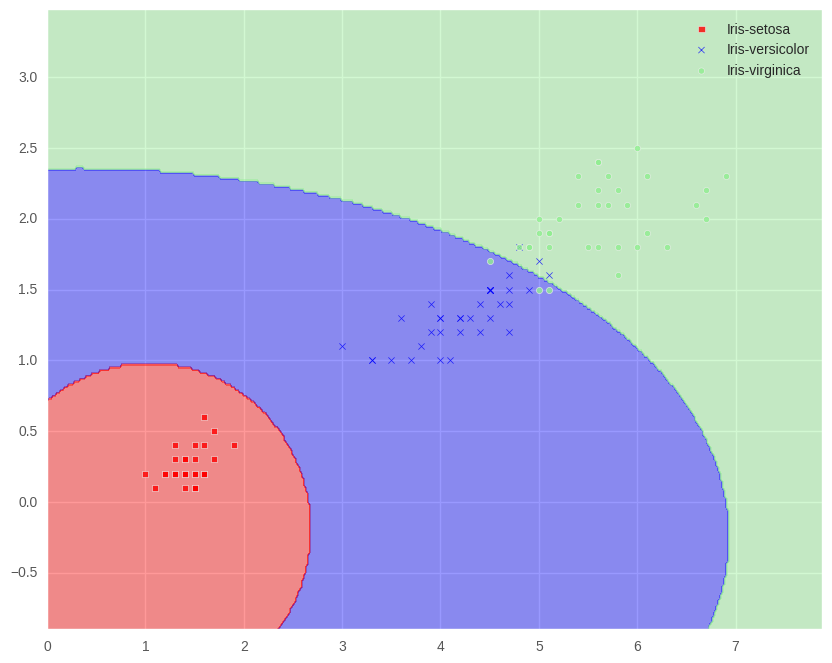

In [53]:
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

### Test Cases for your classifier

In [38]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X[:,2:],Y)
pclasses_val, _ = gb_val.test(X_val[:,2:])
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb.predict(np.array([2,2]).reshape((1,2)))
assert_is_not_none(cls, msg="Predict should work for single example")

print "All cases passed !"

All cases passed !


## Question: What can you conclude from the above decision Region

# K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [18]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)
    totacc.append(acc)

print totacc, 'Mean Accuracy =', np.mean(totacc)

Generating CV data for 3 classes
Mean 
[ 1.45135135  0.24594595]   [ 4.22368421  1.32368421]   [ 5.58684211  2.04210526]
variance 
[ 0.0295252   0.01005113]   [ 0.19075485  0.03601801]   [ 0.27219529  0.07454294]
[Info] Fold 1 Accuracy = 0.916666666667
Mean 
[ 1.47297297  0.24864865]   [ 4.33947368  1.34736842]   [ 5.51842105  2.00789474]
variance 
[ 0.02521549  0.01276844]   [ 0.1992313  0.0398615]   [ 0.30045014  0.06335873]
[Info] Fold 2 Accuracy = 0.972222222222
Mean 
[ 1.46216216  0.24054054]   [ 4.23684211  1.32894737]   [ 5.55263158  2.04210526]
variance 
[ 0.0358656   0.00997809]   [ 0.23601108  0.04047784]   [ 0.30722992  0.07138504]
[Info] Fold 3 Accuracy = 1.0
Mean 
[ 1.47837838  0.24324324]   [ 4.24210526  1.30263158]   [ 5.54210526  2.01315789]
variance 
[ 0.02872169  0.01272462]   [ 0.22454294  0.03394044]   [ 0.29927978  0.08166898]
[Info] Fold 4 Accuracy = 0.944444444444
[0.91666666666666663, 0.97222222222222221, 1.0, 0.94444444444444442] Mean Accuracy = 0.958333333333



Hmm Quite Impressive...
--------------------------------

In [19]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

Mean 
[ 4.99705882  3.37352941  1.48529412  0.25294118]   [ 6.04857143  2.78        4.36        1.36      ]   [ 6.64        2.96571429  5.6         2.03714286]
variance 
[ 0.13557958  0.15782872  0.02890138  0.01249135]   [ 0.25164082  0.08731429  0.17325714  0.0384    ]   [ 0.43725714  0.09882449  0.30971429  0.08862041]


In [20]:
pclasses,res=gb.test(Xtest)

#### Do you expect your Test accuracy to increase or decrease ?

In [21]:
# Using all four attributes, accuracy is 
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

Accuracy =  1.0


### Test cases for all features

In [22]:
from nose.tools import assert_greater_equal, assert_is_not_none
import pandas as pd
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

data_val = pd.read_csv('./iris_val.data')
data_val.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X_val = np.asarray(data_val[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y_val = np.asarray(data_val['Class'].dropna())

gb_val=GaussianBayes()
gb_val.train(X,Y)
pclasses_val, _ = gb_val.test(X_val)
acc_val = np.sum(pclasses_val == Y_val) / float(pclasses_val.shape[0])

assert_greater_equal(acc_val, 0.90, msg="Acc must be greater then 90%")

cls =gb.predict(np.array([2,2,2,2]).reshape((1,4)))
assert_is_not_none(cls, msg="Predict should work for single example")

print "All cases passed !"

Mean 
[ 5.00408163  3.41632653  1.46530612  0.24489796]   [ 5.936  2.77   4.26   1.326]   [ 6.588  2.974  5.552  2.026]
variance 
[ 0.12406497  0.14503957  0.03002082  0.01145356]   [ 0.261104  0.0965    0.2164    0.038324]   [ 0.396256  0.101924  0.298496  0.073924]
All cases passed !


What can you conclude ?
====================

## Let's change the features... 

In [25]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

Mean 
[ 4.99705882  3.37352941]   [ 6.04857143  2.78      ]   [ 6.64        2.96571429]
variance 
[ 0.13557958  0.15782872]   [ 0.25164082  0.08731429]   [ 0.43725714  0.09882449]
Accuracy =  0.777777777778


Remember Features are the important !!
======================

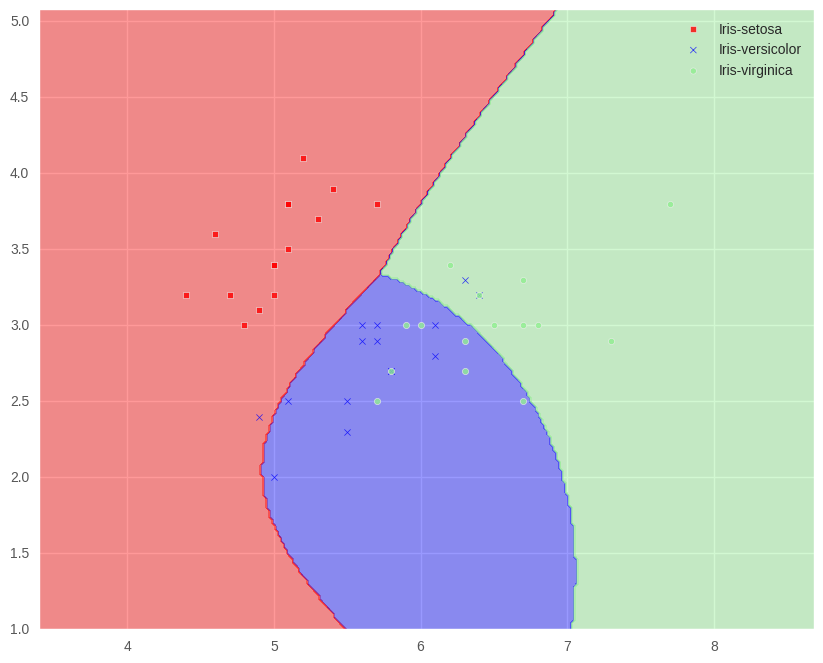

In [26]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

## Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand